In [16]:
# importeren datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

user_ratings = pd.read_csv('user_ratings.csv')
games = pd.read_csv('games.csv')

user_ratings.shape

user_ratings.head()


,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP


In [2]:
# opschonen dataset user_ratings
# ------------------------------------------------------------------

# Om er zeker van te zijn dat er geen ratings boven de 10 of onder de 0 zitten
filtered_user_ratings = user_ratings[(user_ratings['Rating'] >= 0) & (user_ratings['Rating'] <= 10)]

# user_ratings gegroupeerd op basis van de gemiddelde rating per game
group_user_rating = filtered_user_ratings.groupby('BGGId')[['Rating']].mean()
group_user_rating.reset_index()


,BGGId,Rating
0,1,7.672014
1,2,6.642697
2,3,7.484350
3,4,6.599476
4,5,7.439818
...,...,...
21920,347146,7.326190
21921,347521,7.790845
21922,348955,6.820896
21923,349131,6.465152


In [3]:
# opschonen dataset games
# --------------------------------------------------

# Niet-correcte jaartallen gefilterd
filtered_games = games[(games['YearPublished'] >= 1960) & (games['YearPublished'] <= 2021)]

# verwijderen div. columns die geen toegevoegde waarde hebben:
filtered_games_removed_columns = filtered_games.drop(
    [
        'Description', 'GameWeight', 'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumWeightVotes', 
        'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation',
        'Kickstarted', 'ImagePath', 
    ], 
    axis=1)

# User_rating mergen met de games.csv
joined_df = filtered_games_removed_columns.merge(group_user_rating, how = "left", on = 'BGGId')

joined_df.head()


,BGGId,Name,YearPublished,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,NumOwned,NumWant,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating
0,1,Die Macher,1986,7.61428,7.10363,1.57979,3,5,7498,501,...,21926,0,1,0,0,0,0,0,0,7.672014
1,2,Dragonmaster,1981,6.64537,5.78447,1.45440,3,4,1285,72,...,21926,0,1,0,0,0,0,0,0,6.642697
2,3,Samurai,1998,7.45601,7.23994,1.18227,2,4,15578,799,...,21926,0,1,0,0,0,0,0,0,7.484350
3,4,Tal der Könige,1992,6.60006,5.67954,1.23129,2,4,638,54,...,21926,0,0,0,0,0,0,0,0,6.599476
4,5,Acquire,1964,7.33861,7.14189,1.33583,2,6,23735,548,...,21926,0,1,0,0,0,0,0,0,7.439818


In [4]:
# Filter games based on the 'Thematic' category
df_Thematic_grouped = (
    filtered_games[filtered_games['Cat:Thematic'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Thematic_grouped['Category'] = 'Thematic'

# Display the resulting DataFrame
df_Thematic_grouped.head()



,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1962,7.056785,2,2155,7.056785,1503,52,201,0.0,0.0,0.0,Thematic
1,1965,6.218940,1,4075,6.218940,2850,66,280,7.0,0.0,0.0,Thematic
2,1968,6.396140,2,1107,6.396140,513,27,66,0.0,0.0,0.0,Thematic
3,1970,6.983770,1,890,6.983770,462,24,49,0.0,1.0,0.0,Thematic
4,1971,7.178480,1,854,7.178480,486,25,37,0.0,1.0,0.0,Thematic


In [5]:
# Filter games based on the 'Strategy' category
df_Strategy_grouped = (
    filtered_games[filtered_games['Cat:Strategy'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Strategy_grouped['Category'] = 'Strategy'

# Display the resulting DataFrame
df_Strategy_grouped.head()


,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1960,5.77854,1,511,5.77854,219,5,11,0.0,0.0,0.0,Strategy
1,1961,5.79061,1,964,5.79061,396,5,28,0.0,0.0,0.0,Strategy
2,1962,7.79100,1,1631,7.79100,1097,40,152,0.0,0.0,0.0,Strategy
3,1964,6.53019,2,26055,6.53019,19280,558,2717,1.0,0.5,0.0,Strategy
4,1965,5.81772,1,1162,5.81772,268,14,31,0.0,0.0,0.0,Strategy


In [6]:
# Filter games based on the 'War' category
df_War_grouped = (
    filtered_games[filtered_games['Cat:War'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_War_grouped['Category'] = 'War'

# Display the resulting DataFrame
df_War_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1961,5.806280,5,2308,5.806280,809,38,98,0.000000,0.400000,0.0,War
1,1962,6.156254,5,3908,6.156254,1689,116,274,0.400000,0.200000,0.0,War
2,1963,5.820750,2,1194,5.820750,498,17,62,0.000000,0.000000,0.0,War
3,1964,6.311317,3,4435,6.311317,1899,49,193,1.666667,0.000000,0.0,War
4,1965,5.784480,3,3325,5.784480,1313,48,139,1.000000,0.666667,0.0,War


In [7]:
# Filter games based on the 'Family' category
df_Family_grouped = (
    filtered_games[filtered_games['Cat:Family'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Family_grouped['Category'] = 'Family'

# Display the resulting DataFrame
df_Family_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1960,5.883827,4,26361,5.883827,15257,87,507,0.00,0.750000,0.0,Family
1,1961,5.790610,1,964,5.790610,396,5,28,0.00,0.000000,0.0,Family
2,1962,5.986858,4,6056,5.986858,3085,42,186,0.75,0.250000,0.0,Family
3,1963,6.189220,1,1118,6.189220,773,10,37,0.00,0.000000,0.0,Family
4,1964,5.882133,3,6557,5.882133,2221,19,101,0.00,0.333333,0.0,Family


In [8]:
# Filter games based on the 'CGS' category
df_CGS_grouped = (
    filtered_games[filtered_games['Cat:CGS'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_CGS_grouped['Category'] = 'CGS'

# Display the resulting DataFrame
df_CGS_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1993,6.215630,2,37570,6.215630,34175,229,680,65.500000,0.000000,0.0,CGS
1,1994,5.404980,15,13502,5.404980,7986,346,628,3.866667,0.200000,0.0,CGS
2,1995,5.741962,29,18317,5.741962,10578,659,1109,0.931034,0.172414,0.0,CGS
3,1996,5.831551,15,15144,5.831551,9577,475,864,12.666667,0.133333,0.0,CGS
4,1997,6.201734,7,2870,6.201734,1621,187,258,0.285714,0.142857,0.0,CGS


In [9]:
# Filter games based on the 'Abstract' category
df_Abstract_grouped = (
    filtered_games[filtered_games['Cat:Abstract'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Abstract_grouped['Category'] = 'Abstract'

# Display the resulting DataFrame
df_Abstract_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1960,5.762323,3,371,5.762323,440,10,48,0.0,0.333333,0.0,Abstract
1,1962,5.738755,2,5314,5.738755,2468,59,292,0.0,0.000000,0.0,Abstract
2,1963,6.136183,4,2021,6.136183,884,53,196,0.0,0.000000,0.0,Abstract
3,1964,5.728358,5,3162,5.728358,761,39,128,0.0,0.000000,0.0,Abstract
4,1965,5.378218,5,9619,5.378218,3981,41,158,0.0,0.000000,0.0,Abstract


In [10]:
# Filter games based on the 'Party' category
df_Party_grouped = (
    filtered_games[filtered_games['Cat:Party'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Party_grouped['Category'] = 'Party'

# Display the resulting DataFrame
df_Party_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1960,6.67497,1,6271,6.67497,2791,23,185,0.0,0.0,0.0,Party
1,1963,6.70042,1,54,6.70042,53,6,41,0.0,0.0,0.0,Party
2,1964,6.11682,1,2121,6.11682,822,6,29,0.0,0.0,0.0,Party
3,1966,4.53627,1,7265,4.53627,4188,5,72,0.0,0.0,0.0,Party
4,1972,5.18931,1,635,5.18931,511,2,16,0.0,0.0,0.0,Party


In [11]:
# Filter games based on the 'Childrens' category
df_Childrens_grouped = (
    filtered_games[filtered_games['Cat:Childrens'] == 1]
    
    # Group by 'YearPublished' and calculate various aggregated metrics
    .groupby('YearPublished')
    .agg(
        AvgRating=('AvgRating', 'mean'),                    # Average rating per year
        Hoeveel_games=('NumWant', 'count'),                 # Number of games per year
        Hoeveel_verkocht=('NumOwned', 'sum'),               # Total number of games sold per year
        Avg_UserScore=('AvgRating', 'mean'),                # Average user score per year
        Amount_reviews=('NumUserRatings', 'sum'),           # Total number of user reviews per year
        Sum_NumWant=('NumWant', 'sum'),                     # Sum of 'NumWant' per year
        Sum_NumWish=('NumWish', 'sum'),                     # Sum of 'NumWish' per year
        Avg_Expansions=('NumExpansions', 'mean'),           # Average number of expansions per year
        Avg_Implementations=('NumImplementations', 'mean'), # Average number of implementations per year
        Avg_Comments=('NumComments', 'mean')                # Average number of comments per year
    )
    .reset_index()  # Reset index to have 'YearPublished' as a regular column
)

df_Childrens_grouped['Category'] = 'Childrens'

# Display the resulting DataFrame
df_Childrens_grouped.head()

,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1960,4.688827,3,2011,4.688827,1162,4,42,0.0,0.000000,0.0,Childrens
1,1962,5.979310,1,217,5.979310,87,14,34,2.0,0.000000,0.0,Childrens
2,1963,4.744040,2,3799,4.744040,2905,17,98,0.0,1.500000,0.0,Childrens
3,1965,4.513063,8,14490,4.513063,8960,67,299,0.0,1.500000,0.0,Childrens
4,1967,4.851287,3,2934,4.851287,1871,5,65,0.0,0.666667,0.0,Childrens


In [12]:
list_of_dataframes = [df_Thematic_grouped, df_Strategy_grouped, df_War_grouped, df_Family_grouped, df_CGS_grouped, df_Abstract_grouped, df_Party_grouped, df_Childrens_grouped]

# Concatenate the dataframes along the rows
combined_df = pd.concat(list_of_dataframes, ignore_index=True)

# Display the resulting combined dataframe
combined_df.head()


,YearPublished,AvgRating,Hoeveel_games,Hoeveel_verkocht,Avg_UserScore,Amount_reviews,Sum_NumWant,Sum_NumWish,Avg_Expansions,Avg_Implementations,Avg_Comments,Category
0,1962,7.056785,2,2155,7.056785,1503,52,201,0.0,0.0,0.0,Thematic
1,1965,6.218940,1,4075,6.218940,2850,66,280,7.0,0.0,0.0,Thematic
2,1968,6.396140,2,1107,6.396140,513,27,66,0.0,0.0,0.0,Thematic
3,1970,6.983770,1,890,6.983770,462,24,49,0.0,1.0,0.0,Thematic
4,1971,7.178480,1,854,7.178480,486,25,37,0.0,1.0,0.0,Thematic


In [13]:
#We gaan nu beginnen met het regessie model maken

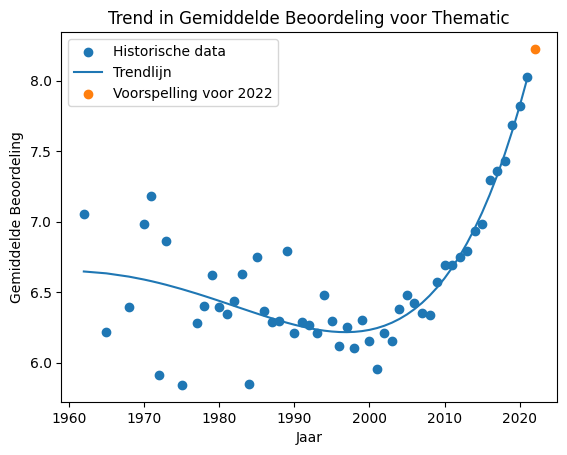

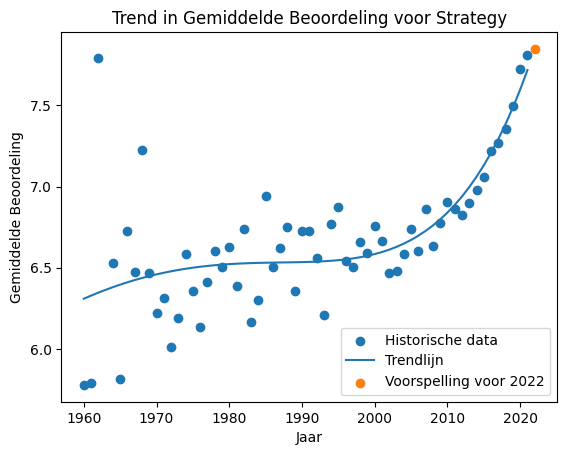

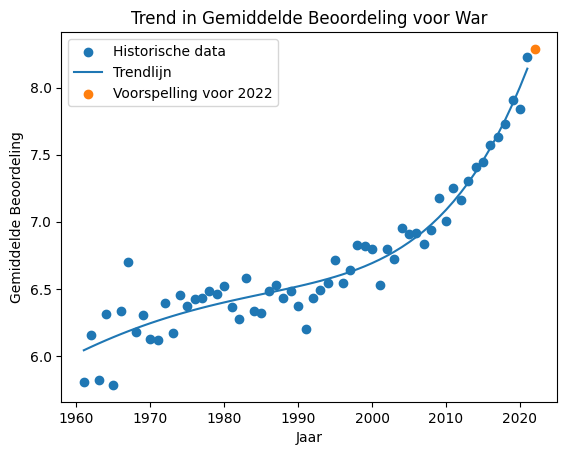

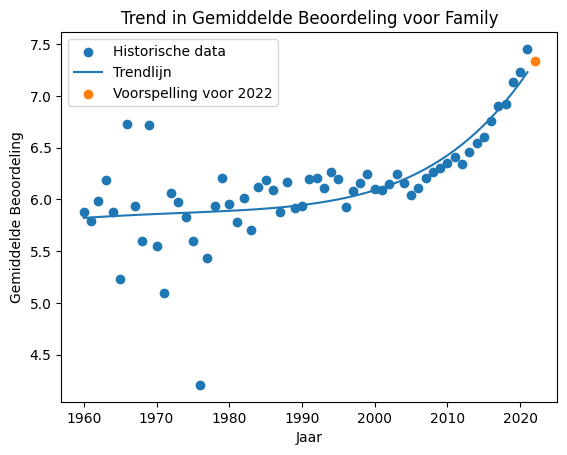

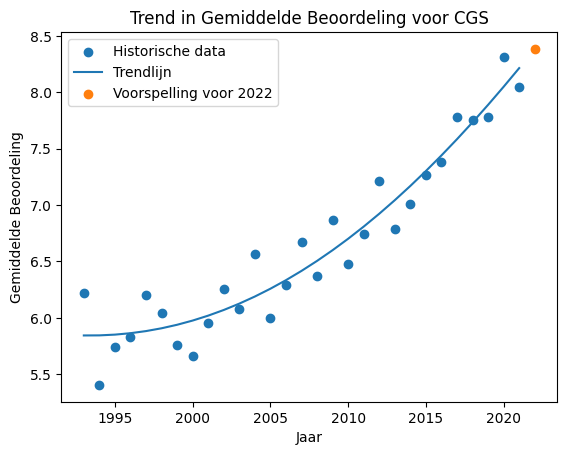

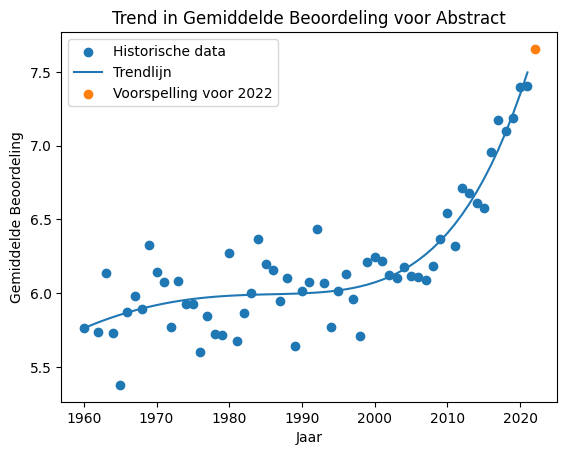

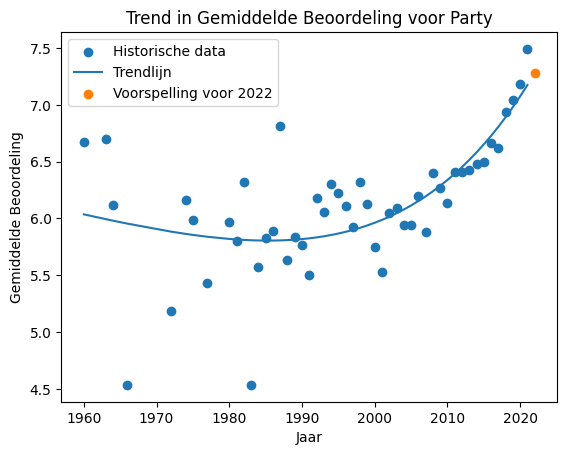

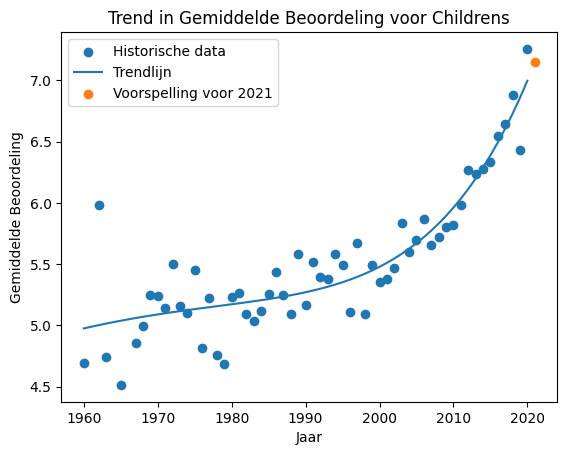

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Aanname: combined_df is al geladen en bevat alle categorieën

# Kies de graad voor de polynomiale regressie
degree = 50  # Je kunt experimenteren met verschillende waarden

# Voer trendanalyse en voorspelling uit voor elke categorie
categories = combined_df['Category'].unique()

for category in categories:
    df_category = combined_df[combined_df['Category'] == category]

    # Bereid de gegevens voor
    X = df_category['YearPublished'].values.reshape(-1, 1)
    y = df_category['AvgRating'].values

    # Transformeer de gegevens voor polynomiale regressie
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    # Polynomiale regressiemodel
    model = LinearRegression()
    model.fit(X_poly, y)

    # Voorspel voor het komende jaar
    next_year = polynomial_features.transform(np.array([[X[-1, 0] + 1]]))
    prediction = model.predict(next_year)

    # Plot de historische data en de voorspelling
    plt.figure()
    plt.scatter(X, y, label='Historische data')
    plt.plot(X, model.predict(X_poly), label='Trendlijn')
    plt.scatter(X[-1, 0] + 1, prediction, label='Voorspelling voor ' + str(X[-1, 0] + 1))
    plt.title('Trend in Gemiddelde Beoordeling voor ' + category)
    plt.xlabel('Jaar')
    plt.ylabel('Gemiddelde Beoordeling')
    plt.legend()
    plt.show()
